# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations in the Weather Analysis:
1. The most relevant comparison is latitude an temperature. It is very clear that max temperatures go up as you get closer to the equator and down as you get further away.
2. Wind speed and cloudiness don't seem to be related to latitude at all. There seem to be clusters around certain latitudes where cloudiness is extreme in one direction but wind speed does not have any significant observations.
3. There are far more observations to the extreme north than extreme south. The points in the northern hemisphere go all the way to a latitude of 80 while the south goes to -60. It's possible that the weather in the extreme south is so extreme that it makes it unlivable. It would be interesting to see some data points from there to see how it affects some of the regressions performed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
query = 'Chicago'
response = requests.get(f"{base_url}{query}").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 73},
 'cod': 200,
 'coord': {'lat': 41.85, 'lon': -87.65},
 'dt': 1644851125,
 'id': 4887398,
 'main': {'feels_like': 10.78,
          'humidity': 66,
          'pressure': 1029,
          'temp': 15.6,
          'temp_max': 17.55,
          'temp_min': 13.41},
 'name': 'Chicago',
 'sys': {'country': 'US',
         'id': 2005153,
         'sunrise': 1644842866,
         'sunset': 1644880920,
         'type': 2},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'gust': 7, 'speed': 3}}


In [5]:
latitude = []
longitude = []
humidity = []
wind_speed = []
cloudiness = []
max_temp = []
city = []
country = []


for idx , row in enumerate(cities):
    try:
        response = requests.get(f"{base_url}{row}").json()
        latitude.append(round(response['coord']['lat'], 2))
        longitude.append(round(response['coord']['lon'], 2))
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city.append(response['name'])
        country.append(response['sys']['country'])
        print(f"{idx}, {row}")
    except:
        print(f"{row} not found")

0, severo-kurilsk
1, carora
2, hilo
3, port alfred
4, qarchak
5, rikitea
6, tuktoyaktuk
7, kavaratti
8, bluff
9, saskylakh
10, hobart
11, kapaa
12, jamestown
13, pevek
nylstroom not found
15, salalah
16, mar del plata
17, cap malheureux
18, punta arenas
illoqqortoormiut not found
20, saint-joseph
21, jalu
amderma not found
23, yoichi
24, port macquarie
25, georgetown
26, lagoa
27, bambous virieux
28, hermanus
29, faanui
30, ushuaia
31, mataura
32, kuusankoski
33, thinadhoo
34, constitucion
35, calvillo
skagastrond not found
37, itagi
38, hualmay
39, new norfolk
tuggurt not found
41, mahanoro
42, naze
43, charters towers
44, chokurdakh
45, yellowknife
46, qaanaaq
taolanaro not found
48, goure
49, castro
50, sioux lookout
51, tchaourou
52, eidsvag
53, namibe
barentsburg not found
55, port elizabeth
56, lulea
57, bredasdorp
58, dingle
59, dikson
60, aykhal
61, rawson
62, butaritari
63, lujan
64, glotovka
65, marystown
66, kamaishi
67, broken hill
68, ribeira grande
69, kodiak
70, anadyr
7

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame({
        "City": city,
        "Country": country,
        "Longitude": longitude,
        "Latitude": latitude,
        "Humidity (%)": humidity,
        "Wind Speed (mph)": wind_speed,
        "Cloudiness (%)": cloudiness,
        "Max Temp (f)": max_temp
})
df.head()

,City,Country,Longitude,Latitude,Humidity (%),Wind Speed (mph),Cloudiness (%),Max Temp (f)
0,Severo-Kuril'sk,RU,156.12,50.68,74,4.45,100,24.98
1,Carora,VE,-70.08,10.18,51,9.01,29,80.71
2,Hilo,US,-155.09,19.73,92,4.61,100,65.93
3,Port Alfred,ZA,26.89,-33.59,74,20.09,100,69.94
4,Qarchak,IR,51.57,35.44,42,7.16,5,52.47


In [7]:
df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
over_humid = df.loc[df['Humidity (%)'] > 100, :]
len(over_humid)

0

In [17]:
#  Get the indices of cities that have humidity over 100%.
#not necessary since len of df above is 0

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

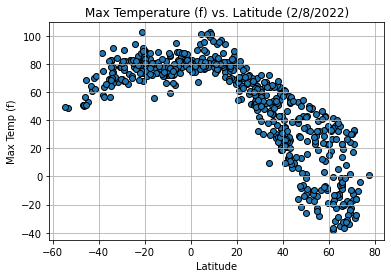

In [9]:
plt.scatter(df['Latitude'], df['Max Temp (f)'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.title('Max Temperature (f) vs. Latitude (2/8/2022)')
plt.grid()
plt.savefig('../output_data/lat_vs_temp_all.svg')
plt.show()

## Latitude vs. Humidity Plot

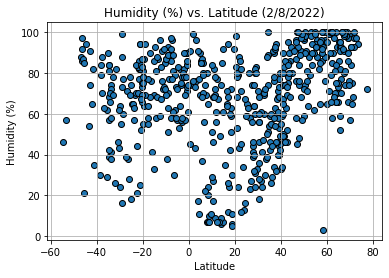

In [10]:
plt.scatter(df['Latitude'], df['Humidity (%)'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude (2/8/2022)')
plt.grid()
plt.savefig('../output_data/lat_vs_humidity_all.svg')
plt.show()

## Latitude vs. Cloudiness Plot

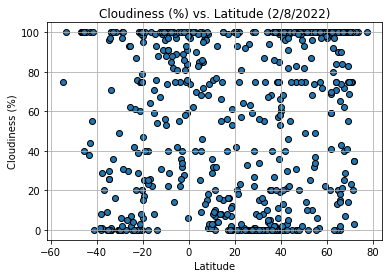

In [11]:
plt.scatter(df['Latitude'], df['Cloudiness (%)'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude (2/8/2022)')
plt.grid()
plt.savefig('../output_data/lat_vs_cloudiness_all.svg')
plt.show()

## Latitude vs. Wind Speed Plot

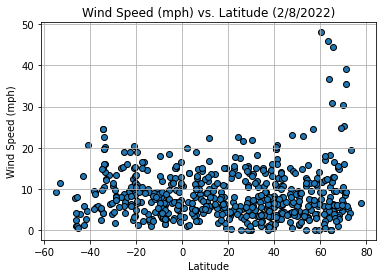

In [12]:
plt.scatter(df['Latitude'], df['Wind Speed (mph)'], edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs. Latitude (2/8/2022)')
plt.grid()
plt.savefig('../output_data/lat_vs_windspeed_all.svg')
plt.show()

## Linear Regression

In [13]:
# Creates DFs for North and South Hemispheres
north_df = df.loc[df['Latitude'] >= 0, :]
south_df = df.loc[df['Latitude'] < 0, :]

In [14]:
#messing around to see if I could cut down on the duplicate code. Works except for annotation placement.
def reg_plot(x, y):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
        line = (slope * x) + intercept
        plt.scatter(x, y)
        plt.xlabel('Latitude')
        plt.ylabel('Max Tem (f)')
        plt.title('Northern Hemisphere Max Temp (f) vs. Latitude')
        plt.plot(x, line, c='r')
        plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (0,-30), c='r',size=15)
        print(f'The R Value is: {rvalue}')
        plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is: -0.8576650371299703


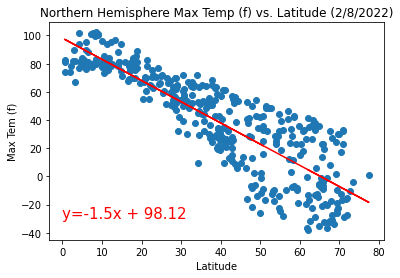

Observation: Regression shows that as the location moves further north from the equator, the temperature goes down. This is an expected result.


In [15]:
x_values = north_df['Latitude']
y_values = north_df['Max Temp (f)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = (slope * x_values) + intercept
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Tem (f)')
plt.title('Northern Hemisphere Max Temp (f) vs. Latitude (2/8/2022)')
plt.plot(x_values, line, c='r')
plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (0,-30), c='r',size=15)
plt.savefig('../output_data/lat_vs_temp_north.svg')
print(f'The R Value is: {rvalue}')
plt.show()
print('Observation: Regression shows that as the location moves further north from the equator, the temperature goes down. This is an expected result.')

The R Value is: -0.8576650371299703


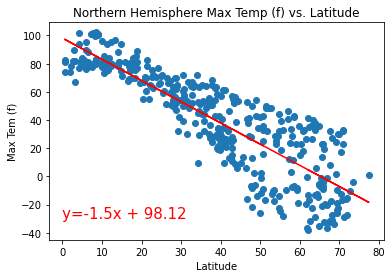

In [16]:
reg_plot(north_df['Latitude'], north_df['Max Temp (f)'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is: 0.5372201719983429


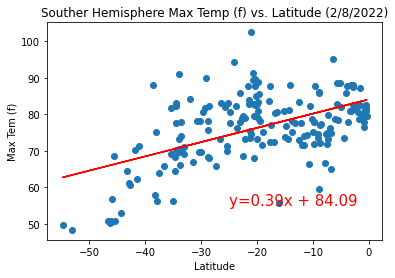

Observation: Regression shows that as the location moves closer to the equator, the tmeperature tends to rise. This is an expected result.


In [17]:
x_values = south_df['Latitude']
y_values = south_df['Max Temp (f)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = (slope * x_values) + intercept
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Tem (f)')
plt.title('Souther Hemisphere Max Temp (f) vs. Latitude (2/8/2022)')
plt.plot(x_values, line, c='r')
plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (-25,55), c='r',size=15)
plt.savefig('../output_data/lat_vs_temp_south.svg')
print(f'The R Value is: {rvalue}')
plt.show()
print('Observation: Regression shows that as the location moves closer to the equator, the tmeperature tends to rise. This is an expected result.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is: 0.492986248599406


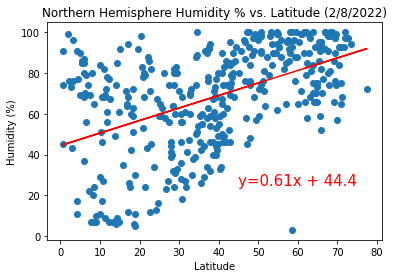

Observation: The linear regression shows that as the location moves away from the equator, it gets slightly more humid on average. This is interesting because I would have assumed it would be the opposite.


In [18]:
x_values = north_df['Latitude']
y_values = north_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = (slope * x_values) + intercept
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity % vs. Latitude (2/8/2022)')
plt.plot(x_values, line, c='r')
plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (45,25), c='r',size=15)
plt.savefig('../output_data/lat_vs_humidity_north.svg')
print(f'The R Value is: {rvalue}')
plt.show()
print('Observation: The linear regression shows that as the location moves away from the equator, it gets slightly more humid on average. This is interesting because I would have assumed it would be the opposite.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is: 0.18343073241847954


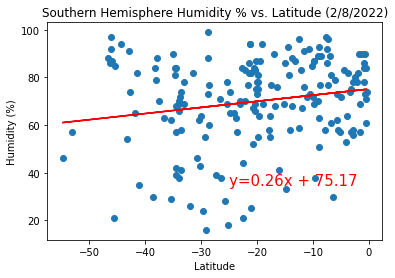

Observation: The linear regression shows that as the location moves closer to the equator, it tends to be more Humid. This is interesting because it is in contast with the northern hemisphere. Overall, the further north on the planet, the higher the humidity on average.


In [19]:
x_values = south_df['Latitude']
y_values = south_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = (slope * x_values) + intercept
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity % vs. Latitude (2/8/2022)')
plt.plot(x_values, line, c='r')
plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (-25,35), c='r',size=15)
plt.savefig('../output_data/lat_vs_humidity_south.svg')
print(f'The R Value is: {rvalue}')
plt.show()
print('Observation: The linear regression shows that as the location moves closer to the equator, it tends to be more Humid. This is interesting because it is in contast with the northern hemisphere. Overall, the further north on the planet, the higher the humidity on average.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is: 0.2347914443684555


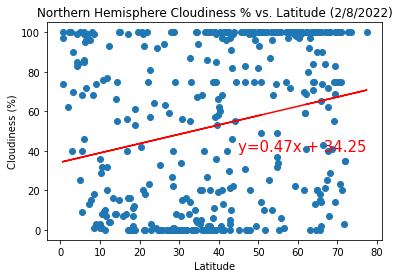

Observation: On average, as you move further away from the equator it gets more cloudy. However, the relationship is not very strong.


In [20]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = (slope * x_values) + intercept
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness % vs. Latitude (2/8/2022)')
plt.plot(x_values, line, c='r')
plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (45,40), c='r',size=15)
plt.savefig('../output_data/lat_vs_cloudiness_north.svg')
print(f'The R Value is: {rvalue}')
plt.show()
print('Observation: On average, as you move further away from the equator it gets more cloudy. However, the relationship is not very strong.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is: 0.23736952942575543


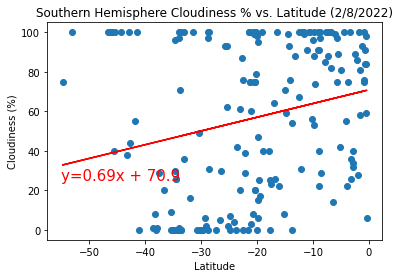

Observation: The regression shows that the closer you get to the equator, the more cloudy it is on average. This relationship is stronger than in the Northern Hemishpere and somewhat contrasts the results in the north.


In [21]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = (slope * x_values) + intercept
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness % vs. Latitude (2/8/2022)')
plt.plot(x_values, line, c='r')
plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (-55,25), c='r',size=15)
plt.savefig('../output_data/lat_vs_cloudiness_south.svg')
print(f'The R Value is: {rvalue}')
plt.show()
print('Observation: The regression shows that the closer you get to the equator, the more cloudy it is on average. This relationship is stronger than in the Northern Hemishpere and somewhat contrasts the results in the north.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is: 0.10690031190103809


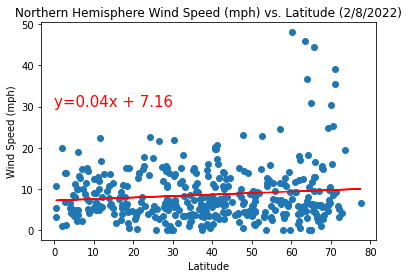

Observation: There is almost no relationship between these latitude and wind speed. The only observable trend is that the more extreme wind speeds are seen closer to the north pole.


In [22]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = (slope * x_values) + intercept
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed (mph) vs. Latitude (2/8/2022)')
plt.plot(x_values, line, c='r')
plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (0, 30), c='r',size=15)
plt.savefig('../output_data/lat_vs_windspeed_north.svg')
print(f'The R Value is: {rvalue}')
plt.show()
print('Observation: There is almost no relationship between these latitude and wind speed. The only observable trend is that the more extreme wind speeds are seen closer to the north pole.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is: -0.08899806560721948


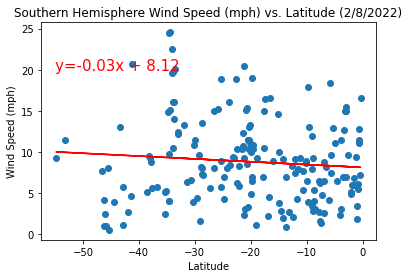

Observation: As in the North, there isn't much of a relationship here. Windspeed goes slightly down the closer you get to the equator but it isn't much.


In [24]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line = (slope * x_values) + intercept
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed (mph) vs. Latitude (2/8/2022)')
plt.plot(x_values, line, c='r')
plt.annotate(f'y={round(slope, 2)}x + {round(intercept,2)}', (-55, 20), c='r',size=15)
plt.savefig('../output_data/lat_vs_windspeed_south.svg')
print(f'The R Value is: {rvalue}')
plt.show()
print("Observation: As in the North, there isn't much of a relationship here. Windspeed goes slightly down the closer you get to the equator but it isn't much.")